In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.datasets import make_regression
from matplotlib import pyplot
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [6]:
def plot_X1_Model(_x, _y):
  plt.scatter(test_features, test_labels, label='Data')
  plt.plot(_x, _y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()

def plot_loss(history, ylim=[0, 100]):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)  

## Create simple dataset

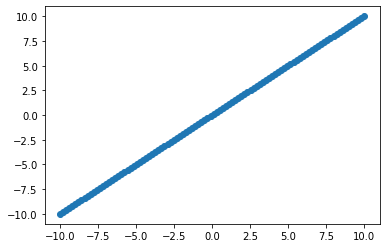

In [8]:
def gen_func(b,e,n):
    x = np.linspace(b, e, n)
    y = x
    return x, y


x,y = gen_func(-10,10,100)
pyplot.scatter(x,y)
pyplot.show()


In [10]:
train_features, train_labels = gen_func(-10,10,100)
test_features, test_labels = gen_func(-30,-10,100)
test_s_features, test_s_labels = gen_func(-5,5,20)

display(train_features[:10])
display(test_features[:10])
display(test_s_features[:10])

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818])

array([-30.        , -29.7979798 , -29.5959596 , -29.39393939,
       -29.19191919, -28.98989899, -28.78787879, -28.58585859,
       -28.38383838, -28.18181818])

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789])

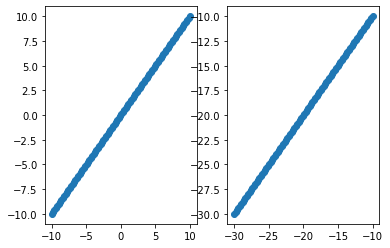

In [11]:
pyplot.subplot(1, 2, 1)
pyplot.scatter(train_features,train_labels)
pyplot.subplot(1, 2, 2)
pyplot.scatter(test_features,test_labels)
pyplot.show()

## Create Linear Regression Network

In [15]:
#model 
X1_model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=[1,])
])


display(X1_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


None

In [16]:
# test prediction shape
display(X1_model.predict(train_features[:2]))

array([[7.714938],
       [7.55908 ]], dtype=float32)

In [17]:
#compile model 
X1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mape')

In [20]:
%%time
#train model X1
history_X1 = X1_model.fit(
    train_features, train_labels,
    epochs=500,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 13.5 s, sys: 538 ms, total: 14 s
Wall time: 12.6 s


In [10]:
hist_X1 = pd.DataFrame(history_X1.history)
hist_X1['epoch'] = history_X1.epoch
display(hist_X1.tail(2))

,loss,val_loss,epoch
1498,0.335020,0.777762,1498
1499,0.516428,0.936373,1499


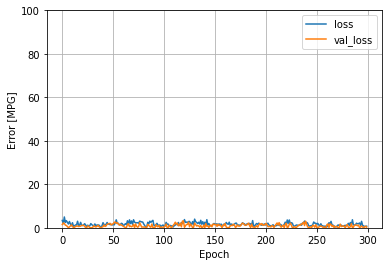

In [21]:
plot_loss(history_X1)

In [12]:
test_results = {}

test_results['X1_trains'] = X1_model.evaluate(
    train_features,
    train_labels, verbose=0)

test_results['X1_test'] = X1_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results['X1_s_trains'] = X1_model.evaluate(
    test_s_features,
    test_s_labels, verbose=0)    

display(test_results)    

{'X1_trains': 0.9204521775245667,
 'X1_test': 0.940720796585083,
 'X1_s_trains': 0.8180992007255554}

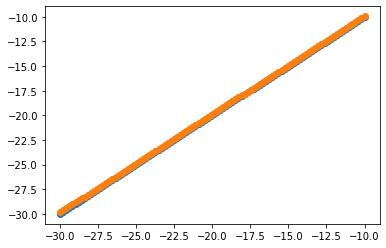

In [23]:
#pyplot.scatter(train_features,train_labels)
pyplot.scatter(test_features,test_labels)
pyplot.scatter(test_features,X1_model.predict(test_features))
pyplot.show()